# Basic Radiative Transfer Calculation

In this example we will calculate radiances from 340 nm to 700 nm in 1 nm steps using SASKTRAN-Disco. The geometry will be configured to be TEMPO looking at the ARG office on June 2 2017 at 3:14 PM and the atmosphere will be configured to consider Rayleigh scattering, O<sub>3</sub>, and NO<sub>2</sub>.

In [1]:
%matplotlib inline

In [2]:
import sasktran as sk
import sasktran.disco.interface as do
import numpy as np
import matplotlib.pyplot as plt

First we need to configure our sk.Geometry object. This object specifies the
line of sight vectors as well as the solar position (based on mean mjd).

In [3]:
geometry = sk.NadirGeometry()

# make the look vector from TEMPO to the ARG office
tempo = sk.Geodetic()
tempo.from_lat_lon_alt(0, -100, 35786000)
geometry.from_lat_lon(
    lats=52.131638, 
    lons=-106.633873,
    elevations=0,
    mjd=57906.843, 
    observer=tempo
)

Next we need to configure our sk.Atmosphere object. This object specifies all
atmospheric and surface properties to the engine.

In [4]:
atmosphere = sk.Atmosphere()

# add our species
atmosphere['rayleigh'] = sk.Species(sk.Rayleigh(), sk.MSIS90())
atmosphere['o3'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['no2'] = sk.Species(sk.NO2OSIRISRes(), sk.Pratmo())
atmosphere.atmospheric_state = sk.MSIS90()

# add our surface properties
atmosphere.brdf = sk.Kokhanovsky()

We are now ready to perform the radiance calculation. Note that the engine can
be default constructed (with properties set after construction), or the
properties can be passed to the constructor.

In [5]:
wavelengths = np.linspace(340,700, 361)
engine = do.EngineDO(geometry=geometry, atmosphere=atmosphere, wavelengths=wavelengths)
rad = engine.calculate_radiance()

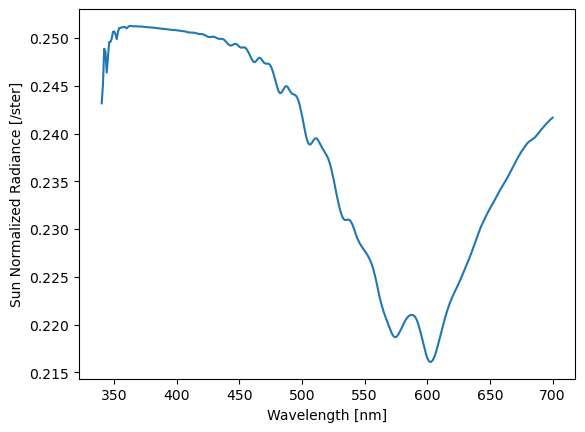

In [6]:
# Make plot
plt.figure()
plt.plot(rad['wavelength'], rad['radiance'])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Sun Normalized Radiance [/ster]')
plt.show()